In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
file= pd.ExcelFile('Bank_Personal_Loan_Modelling.xlsx')

In [ ]:
description=pd.read_excel(file, 'Description')
df=pd.read_excel(file, 'Data')

In [ ]:
description.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,Data Description:,NaN
5,NaN,NaN,NaN
6,NaN,ID,Customer ID
7,NaN,Age,Customer's age in completed years
8,NaN,Experience,#years of professional experience
9,NaN,Income,Annual income of the customer ($000)


In [ ]:
description.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
description.drop(axis=0,index=[0,1,2,3,4],inplace=True)

In [ ]:
description.rename(columns={'Unnamed: 1':'Column Name','Unnamed: 2':'Column Description'}, inplace=True)

In [ ]:
pd.set_option('display.max_colwidth', 0)
print(description)

           Column Name  \
5   NaN                  
6   ID                   
7   Age                  
8   Experience           
9   Income               
10  ZIPCode              
11  Family               
12  CCAvg                
13  Education            
14  Mortgage             
15  Personal Loan        
16  Securities Account   
17  CD Account           
18  Online               
19  CreditCard           

                                                             Column Description  
5   NaN                                                                          
6   Customer ID                                                                  
7   Customer's age in completed years                                            
8   #years of professional experience                                            
9   Annual income of the customer ($000)                                         
10  Home Address ZIP code.                                                       
11  Famil

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df_loan_accept=df[df['Personal Loan']==1]

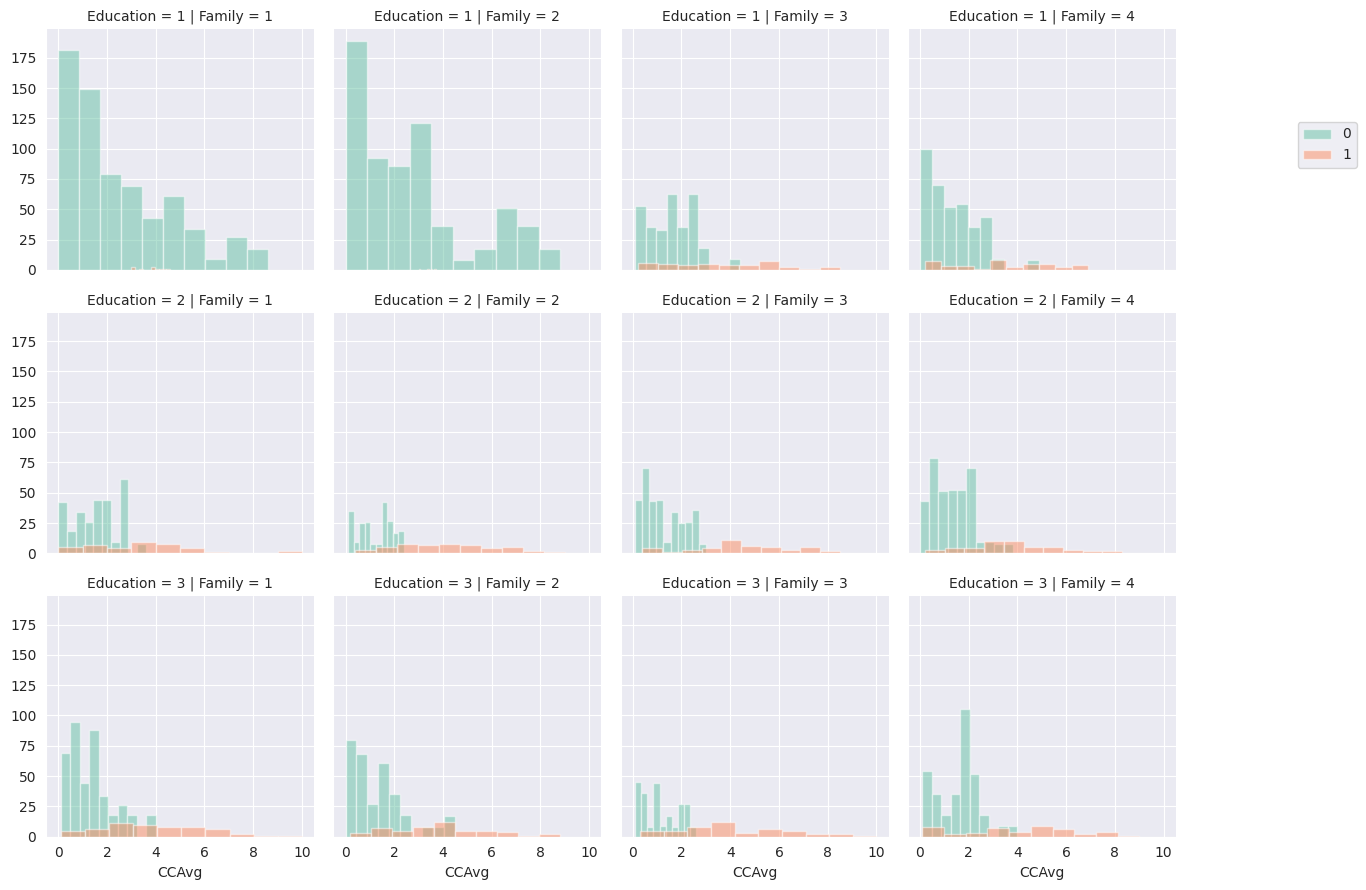

In [ ]:
sns.set_style('darkgrid')
g=sns.FacetGrid(df,row='Education',col='Family',hue='Personal Loan',palette='Set2')
g=g.map(plt.hist, 'CCAvg', alpha=0.5)
plt.legend(bbox_to_anchor=(1.7,3))

It can be inferred that usually Undergraduates with a small family donot tend apply for a loan.

<Axes: xlabel='Education', ylabel='count'>

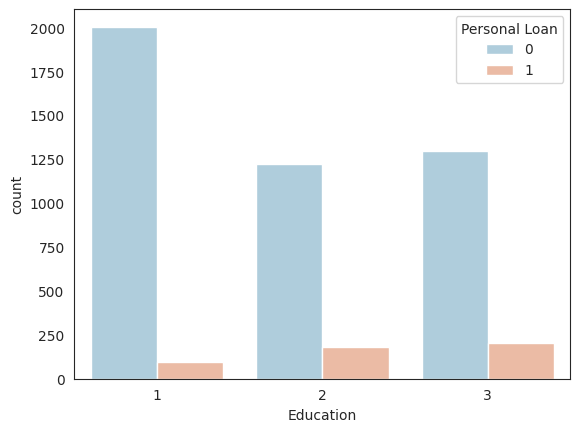

In [ ]:
sns.set_style('white')
sns.countplot(data=df,x='Education',hue='Personal Loan',palette='RdBu_r')

Most of the loan applicants are Professionals

The value of house mortagage for the non-applicants is much lower than that of applicants. This could be a possible reason for them not applying for a loan or not finding a policy based on there need.

<Axes: xlabel='Securities Account', ylabel='count'>

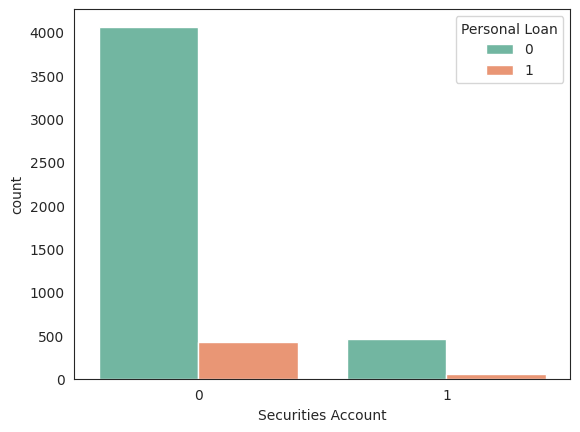

In [ ]:
sns.set_style('white')
sns.countplot(data=df,x='Securities Account',hue='Personal Loan',palette='Set2')

It is clear that very few loan applicants have a securities account.

**Using Decision Tree algorithm to predict the nature of loan acceptance**

In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
X=pd.DataFrame(columns=['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','CreditCard','Online'],data=df)

In [ ]:
y=df['Personal Loan']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree= DecisionTreeClassifier(max_leaf_nodes=3)

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

In [ ]:
predictions= dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1119
           1       0.92      0.76      0.83       131

    accuracy                           0.97      1250
   macro avg       0.95      0.88      0.91      1250
weighted avg       0.97      0.97      0.97      1250



In [ ]:
print(confusion_matrix(y_test,predictions))

[[1110    9]
 [  31  100]]


<ipython-input-31-629d0160bc60>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='Personal Loan', ylabel='Density'>

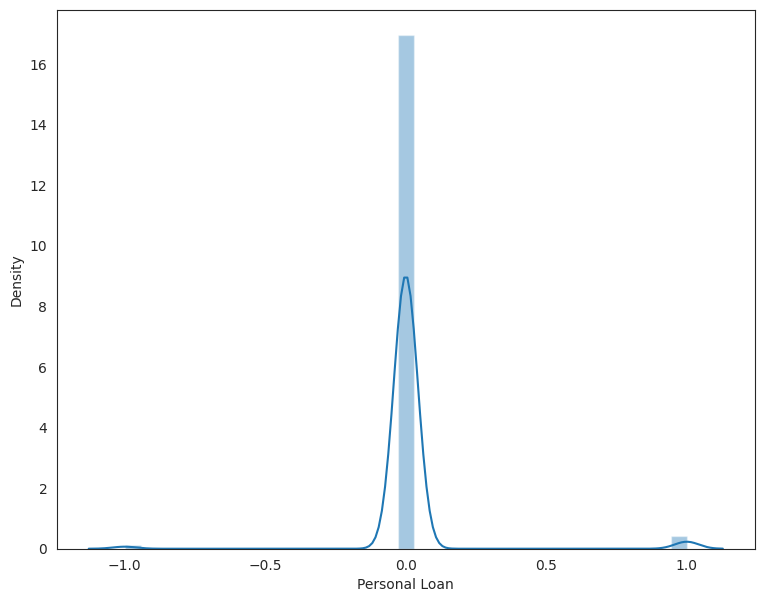

In [ ]:
plt.figure(figsize=(9,7))
sns.distplot(y_test-predictions)